**<small>Abstract:</small>**

<small>This metagenomic analysis workflow focuses on profiling microbial communities from sequencing data. Raw sequencing reads stored in FASTQ files are preprocessed and subsampled for efficient analysis. Using MetaPhlAn, a specialized tool for taxonomic profiling, the microbial composition is identified based on marker genes. The workflow includes environment setup with micromamba, database management, and execution of taxonomic classification on subsampled data. Results are parsed and visualized to show relative abundances of taxa, providing insights into the microbial diversity and structure of the sampled environment. This approach enables efficient and accurate characterization of complex microbial populations in a reproducible manner.</small>

**<small>Downloading Raw Sequencing Data</small>**

In [2]:
%%bash
# Download the SRS015646 dataset (buccal mucosa samples) from the Human Microbiome Project Data Analysis and Coordination Center
wget http://downloads.hmpdacc.org/data/Illumina/buccal_mucosa/SRS015646.tar.bz2

--2025-07-02 15:36:39--  http://downloads.hmpdacc.org/data/Illumina/buccal_mucosa/SRS015646.tar.bz2
Resolving downloads.hmpdacc.org (downloads.hmpdacc.org)... 134.192.156.26
Connecting to downloads.hmpdacc.org (downloads.hmpdacc.org)|134.192.156.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1185179767 (1.1G) [application/x-bzip2]
Saving to: ‘SRS015646.tar.bz2.1’

     0K .......... .......... .......... .......... ..........  0%  141K 2h16m
    50K .......... .......... .......... .......... ..........  0%  283K 1h42m
   100K .......... .......... .......... .......... ..........  0% 8.98M 69m2s
   150K .......... .......... .......... .......... ..........  0% 1.20M 55m41s
   200K .......... .......... .......... .......... ..........  0%  368K 55m1s
   250K .......... .......... .......... .......... ..........  0% 9.27M 46m11s
   300K .......... .......... .......... .......... ..........  0% 9.58M 39m52s
   350K .......... .......... .......... .......

**<small>Install Miniconda</small>**

In [3]:
%%bash
# Download the Miniconda installer for Python 3.9 (Linux 64-bit), suppressing output
wget https://repo.anaconda.com/miniconda/Miniconda3-py39_4.10.3-Linux-x86_64.sh &>/dev/null

# Make the installer executable
chmod u+x Miniconda3-py39_4.10.3-Linux-x86_64.sh

# Run the installer in batch mode, force overwrite if needed, and install to /usr/local (no output)
./Miniconda3-py39_4.10.3-Linux-x86_64.sh -b -f -p /usr/local &>/dev/null

# Delete the installer script after installation
rm Miniconda3-py39_4.10.3-Linux-x86_64.sh

**<small>Install the package manager Mamba</small>**

In [4]:
%%bash
# Install the 'mamba' package manager from the conda-forge channel without prompting for confirmation
conda install -c conda-forge mamba --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h4bc722e_7         247 KB  conda-forge
    c-ares-1.34.5              |       hb9d3cd8_0         202 KB  conda-forge
    ca-certificates-2025.6.15  |       hbd8a1cb_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    cffi-1.17.1                |   py39h15c3d72_0         236 KB  conda-forge
    conda-22.11.1              |   py39hf3d152e_1         904 KB  conda-forge
    cpp-expected-1.1.0         |       hff21bea_1          24 KB  conda-forge
    cryptography-45.0.4        |   py39h7170ec2_0         1.5 MB  conda-forge
    fmt-11.1.4                 |       h07f6e7f_1         187 KB  conda-forge
    krb5-1.21.3   



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [5]:
%%bash
# Download the latest version of micromamba for Linux 64-bit and extract only the binary file
wget -qO- https://micromamba.snakepit.net/api/micromamba/linux-64/latest | tar -xvj bin/micromamba

# Create the target directory for micromamba if it doesn't exist
mkdir -p /usr/local/micromamba

# Move the micromamba binary to the target directory
mv bin/micromamba /usr/local/micromamba/

# Remove the now-empty 'bin' directory after moving the binary
rm -r bin

bin/micromamba


In [6]:
%%bash
# Extract the contents of the SRS015646.tar.bz2 archive into the /content/ directory
tar -xvjf /content/SRS015646.tar.bz2 -C /content/

SRS015646/
SRS015646/SRS015646.denovo_duplicates_marked.trimmed.singleton.fastq
SRS015646/SRS015646.denovo_duplicates_marked.trimmed.2.fastq
SRS015646/SRS015646.denovo_duplicates_marked.trimmed.1.fastq


In [7]:
%%bash
# Initialize micromamba shell hook so micromamba commands work properly
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Create a new conda environment named 'mpa' with python 3.7 and metaphlan installed from bioconda and conda-forge channels
micromamba create -y -n mpa -c conda-forge -c bioconda python=3.7 metaphlan

# Activate the 'mpa' environment to use MetaPhlAn and its dependencies
micromamba activate mpa



Transaction

  Prefix: /usr/local/envs/mpa

  Updating specs:

   - python=3.7
   - metaphlan


  Package                               Version  Build                   Channel           Size
─────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex                           0.1  conda_forge             conda-forge        3kB
  + _openmp_mutex                           4.5  2_gnu                   conda-forge       24kB
  + _r-mutex                              1.0.1  anacondar_1             conda-forge        4kB
  + anyio                                 3.7.1  pyhd8ed1ab_0            conda-forge       97kB
  + argcomplete                           3.0.8  pyhd8ed1ab_0            conda-forge       38kB
  + argon2-cffi                          23.1.0  pyhd8ed1ab_0            conda-forge       19kB
  + argon2-cffi-bindin

++ dirname -- /usr/local/envs/mpa/bin/installBiocDataPackage.sh
+ SCRIPT_DIR=/usr/local/envs/mpa/bin/../share/bioconductor-data-packages
+ json=/usr/local/envs/mpa/bin/../share/bioconductor-data-packages/dataURLs.json
++ yq '."genomeinfodbdata-1.2.9".fn' /usr/local/envs/mpa/bin/../share/bioconductor-data-packages/dataURLs.json
+ FN='"GenomeInfoDbData_1.2.9.tar.gz"'
+ IFS=
+ read -r value
++ yq '."genomeinfodbdata-1.2.9".urls[]' /usr/local/envs/mpa/bin/../share/bioconductor-data-packages/dataURLs.json
+ URLS+=($value)
+ IFS=
+ read -r value
+ URLS+=($value)
+ IFS=
+ read -r value
+ URLS+=($value)
+ IFS=
+ read -r value
++ yq '."genomeinfodbdata-1.2.9".md5' /usr/local/envs/mpa/bin/../share/bioconductor-data-packages/dataURLs.json
+ MD5='"7cc138cfb74665fdfa8d1c244eac4879"'
+ STAGING=/usr/local/envs/mpa/share/genomeinfodbdata-1.2.9
+ mkdir -p /usr/local/envs/mpa/share/genomeinfodbdata-1.2.9
+ TARBALL='/usr/local/envs/mpa/share/genomeinfodbdata-1.2.9/"GenomeInfoDbData_1.2.9.tar.gz"'
+ SUCCE

**<small>Metagenomic Analysis</small>**

In [15]:
%%bash
# Extract the first 4 lines from the FASTQ file to create a smaller test sample file
head -n 4 /content/SRS015646/SRS015646.denovo_duplicates_marked.trimmed.1.fastq > /content/test_sample.fastq

In [ ]:
%%bash
# (Re)activate the environment and run MetaPhlAn on your FASTQ file
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'mpa' environment to use MetaPhlAn and its dependencies
micromamba activate mpa

# Run the analysis – output will be saved in `test_profile.txt`
metaphlan /content/test_sample.fastq \
  --input_type fastq \
  --nproc 2 \
  -o /content/test_profile.txt

In [24]:
# Open the FASTQ file and print its contents line by line
with open("/content/test_sample.fastq") as f:
    for line in f:
        print(line.strip())

@HWUSI-EAS672_102539088:3:100:10000:14256/1
CGTTCCTAGCATCATGATTTTACCAACGGAAGTGTGCGAATGCACGGTTAGCTTCAGCCATACGGTGAGTGTCTTCACGTTTCTTAACAGCTGCACCAGT
+HWUSI-EAS672_102539088:3:100:10000:14256/1
GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEEGFGGGGGGGGGGFEFGGEGEEGDEGGGEEGEEBDDDBDACDCDCCCBEBEEECE?BEEEEEBAA:?;


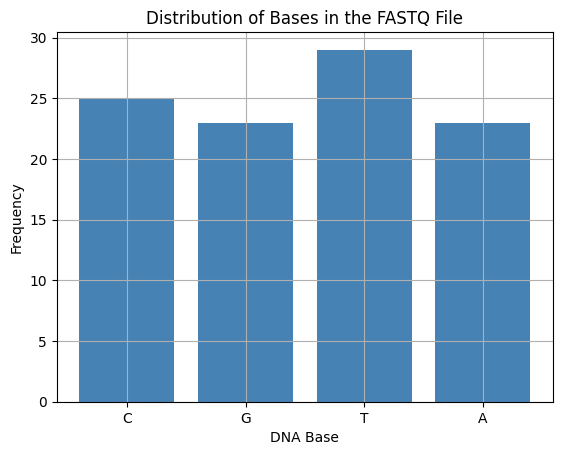

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

# Read only the sequence lines (line 2 of each FASTQ read, i.e., lines 2, 6, 10, ...)
seq_lines = []
with open("/content/test_sample.fastq") as f:
    lines = f.readlines()
    seq_lines = lines[1::4]  # every second line out of each group of 4 lines

# Count total bases
base_counts = Counter()
for seq in seq_lines:
    base_counts.update(seq.strip())

# Display the bar plot
plt.bar(base_counts.keys(), base_counts.values(), color="steelblue")
plt.xlabel("DNA Base")
plt.ylabel("Frequency")
plt.title("Distribution of Bases in the FASTQ File")
plt.grid(True)
plt.show()